In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# KMeans clustering
from sklearn.cluster import KMeans

# Loading the digit dataset
from sklearn.datasets import load_digits

# Selecting k through silhoutte score.
from sklearn.metrics import silhouette_score

# Normalization through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

### Clustering of digits

We will use digit dataset for clustering, which is loaded through load_digit API.

- It loads 8x8 digit images with approximately 180 samples per class.
- From 10 classes, it has total of 1797 images.
- Each pixel has value between 0 and 16.


In [2]:
digits = load_digits()

In [4]:
?KMeans

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm imple

In [5]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 50,
    "max_iter": 500,
    "random_state": 0,
}

In [6]:
pipeline = Pipeline(
    [
        ("Preprocess", MinMaxScaler()),
        ("Clustering", KMeans(n_clusters=10, **kmeans_kwargs)),
    ]
)
pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

In [8]:
cluster_centers = pipeline[-1].cluster_centers_

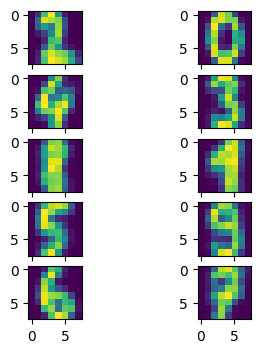

In [9]:
# displaying centroids
fig, ax = plt.subplots(5, 2, figsize=(4, 4))
for i,j in zip(ax.flat, cluster_centers.reshape(10,8, 8)):
    i.imshow(j)

In this case, the number of clusters were known. Hence we set k=10 and got the clusters.

For deciding the optimal number of clusters through elbow and silhoutte, we will pretend that we do not know the number of clusters in the data
and we will try to discover the optimal number of clusters through these two methods one by one:

## Elbow method

In [10]:
#Identifying the correct number of clusters
sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1,12):
    kmeans = KMeans (n_clusters=k, ** kmeans_kwargs)
    kmeans.fit (scaled_digits)
    sse_digit.append(kmeans.inertia_)

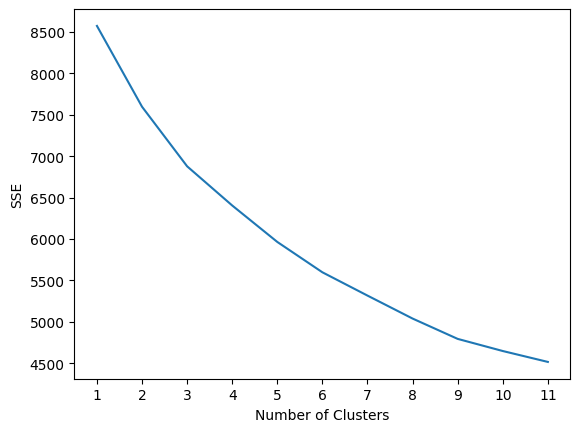

In [11]:
plt.plot(range(1, 12), sse_digit)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

There is a slight elbow at `k=9`, which could point to the fact that a few digits may have been merged in one cluster.

## Silhoutte

In [12]:
sil_coef_digits = []
for k in range(2, 15):
    kmeans = KMeans (n_clusters=k, ** kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append(score)

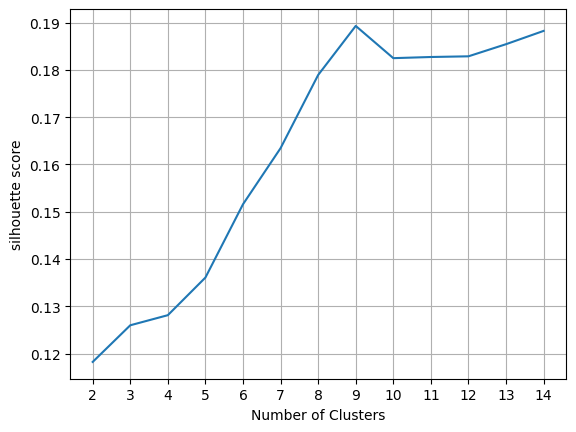

In [13]:
plt.plot(range(2, 15), sil_coef_digits)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.grid(True)
plt. show ()

In [14]:
# get the value of K for which
# sillhoutte coefficient is highest
print(np.argmax(sil_coef_digits)+2)

9


This graph points the fact that n=9 this could be because some of the digits like 1 and 7 make have striking similarity.